## Portfolio Assignment week 04
#### Author: Karina Diaz

This first week of the *supervised* part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of *gradient descent* by hand. Later, we will off course just use [sklearn SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html) for this.

Load [the data for this exercise](../Data/housing-data.txt). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes. 

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis). 

As we have discussed, the general formula for the cost of a model is as follows:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $n \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$. 

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

3. Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.

4. Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?


In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml


In [4]:
def get_config():
    ''' Function to set the config file.
    Returns:
        A function that helps open the config file'''
    
    with open("config_DS3.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config


In [5]:
# Getting the data from the files using the config file
config = get_config()
house_file = (config['housing']) 

# Creating the dataframes with the data
data = pd.read_csv(house_file)

In [6]:
# Exploring the data
print(data.shape)
print(data.dtypes)
data.head()

(200, 2)
size     float64
price    float64
dtype: object


,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


Scatterplot of the house data

In [108]:
def plot_scatter(type):
    '''
    Function to plot the orginal housing data
    Arguments:
        type: The type of plot to plot. If equal to 'Gradient descendant' 
        specific labels are plotted. If any other type is passed different labels
        are provided
    Retunrs
        Scatterplot of the housing data
    '''
    plt.figure(figsize=(12, 5))
    plt.plot(data['size'], data['price'],'.', color='pink', label='Data points')
    plt.xlabel('House size')
    if (type=='Gradient descendant'):
        plt.title('House pricing acording to its size - Gradient Descendant')
        plt.ylabel('House price ( J(θ) )')
    else:
        plt.title('House pricing acording to its size')
        plt.ylabel('House price')
    

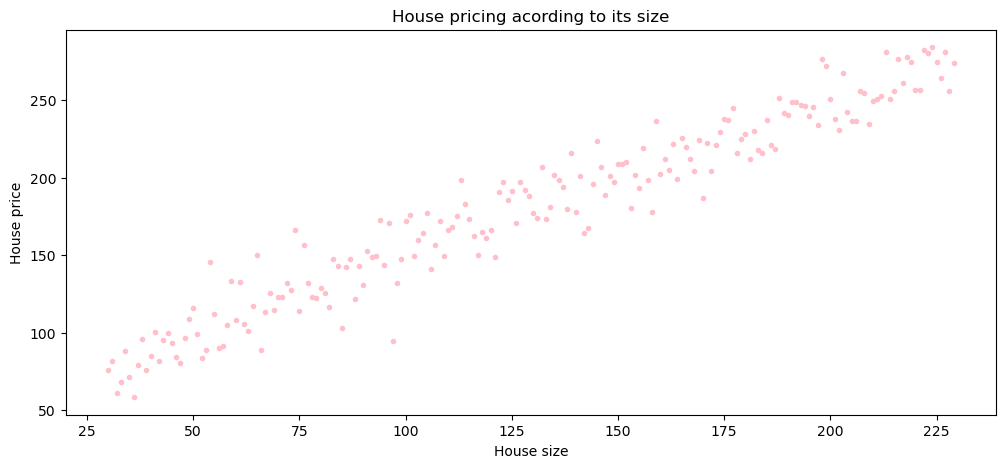

In [109]:
plot_scatter(type = 'Normal')

We can see a linear regression. If the house size increases, the price increases. 

### Defining the variables to create gradient descendant algorithm

In [110]:
# House Size
X = np.stack((np.ones(200), data['size']), axis=-1)
print('X shape', X.shape)

# House Price
y = np.array(data['price']).reshape(200,1)
print('y shape',y.shape)

# Giving a [0,0] value to theta
theta = np.array([0,0]).reshape(2,1) 
print('theta shape', theta.shape)


X shape (200, 2)
y shape (200, 1)
theta shape (2, 1)


### Creating the functions to calculate the cost and gradient descent 

In [10]:
def compute_cost(X, y, theta):
    '''Function that calculates the cost model formula using vectorized data 
    and linear algebra to calculte the house cost.
    Formula: # J(theta) = (1/(2*m))*sum(((X * theta)-y)**2)
    Arguments:
        X: matrix (m x n) - House size  +  colum of ones
        y: vector of house prices
        theta: a vector with the form [0,0]
    Returs:
        total_cost: J(theta) the predicted cost for a defined theta.
        '''
    
    m = X.shape[0] # number of sums = lenght of the House size vector
    sum = ((X.dot(theta) - y) **2)
    sum =  np.float128(sum)
    total_cost = (1/(2*m))*np.sum(sum)
    
    return total_cost 

In [11]:
# Computing cost of the real data with theta = [0,0]
compute_cost(X, y, theta)

17840.780961229346051

In [105]:
def gradient_descent(X, y, theta, alpha, num_iters):
    '''Function that calculates  and plot the gradient descent algoritm for 
    different thetas, based on the number of iterations and alpha provided.
    It uses the compute_cost function created above to calculate the best cost 
    value for every theta. It also uses the plot_scatter function to plot the
    housing data. 
    Arguments:
        X: matrix (m x n) - House size  +  colum of ones
        y: vector of house prices
        theta: a vector with the form [0,0]
        alpha: learning rate of the algorithm
        num_iter: number of predctions that are going to be calculated
    Returs:
        theta_list: All the theta values predicted
        cost_list: All the cost values predicted
        Plot of the house data as well as the gradient descent predictions
    ''' 
    # Inizialiting the vectors and defining the data types
    cost_list = np.empty(1,dtype=np.float128)
    theta_list = np.array(theta, dtype=np.float128)

    #Call the plot function
    plot_scatter(type='Gradient descendant')
    # Define the colors for the predictions
    colors=[ "#7f7f7f", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
            'black' ,"#1f77b4", "#bcbd22", "#17becf","#e377c2", 'yellow']
    
    # Plotting and calculating the predictions
    for iteration in range(num_iters):
        cost = compute_cost(X, y, theta)
        cost = np.float128(cost)
        # Updating theta
        theta = theta - (alpha * cost)
        theta_list = np.append(arr = theta_list, values=theta)
        # Appending the cost values calcultated
        cost_list = np.append(arr = cost_list, values=cost)
        # Plotting
        plt.plot((30,229), (cost_list[1], cost), marker='.', 
                color= colors[iteration], ls='-.',label=f"Prediction {iteration}")
        plt.legend(loc="upper left", fontsize=9)

    # Delete te first element of the list becuase it was a random value    
    cost_list = np.delete(cost_list, 0)
    return theta_list, cost_list



I cannot predict more than 12 values due to memmory constrains. I am using the biggest datatype that could be computed by python (float 128).   
Alpha is the learning rate, that is how small are the steps taken while perfomming the gradient descent calculation. 


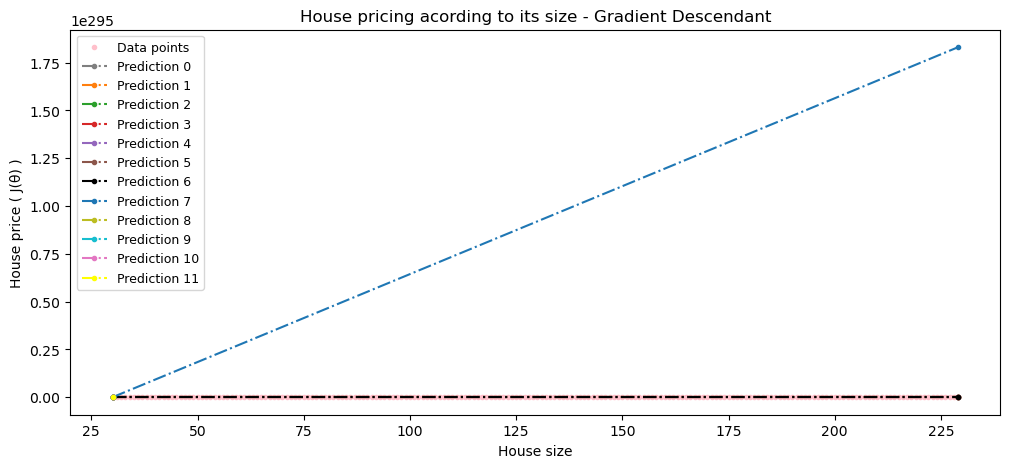

In [106]:
# Running the gradient_descent
theta_list, cost_list = gradient_descent(X=X, y=y, theta=theta,
                                        alpha = 0.001, num_iters=12)

In the next plot we can see the 12 values calculated.  
As we can see only 8 values are plotted. Prediction 7 is the best prediction calculated. The reason not all the predictions are plotted is because the cost values are really big (inf) that cannot be plotted in the graph (see below). 


In [112]:
# Values of theta
theta_list.reshape(13,2)
print('The best theta calculated:', theta_list[[-2,-1]])


The best theta calculated: [-2.08340435e+4691 -2.08340435e+4691]


The goal was to minimise the thetas and as we can see in every iteration the theta is getting smaller and smaller. With the best theta predicted there is an increase in cost.

In [115]:
data.tail(1)

,size,price
199,229.0,273.728558


In [113]:
# Price (y) predicted with the cost value function and different thetas.
print('The cost value for the best theta calculated:', cost_list[-1])


The cost value for the best theta calculated: 2.083404347399793234e+4694


In [17]:
cost_list.reshape(12,1)

array([[1.78407810e+0004],
       [3.73508815e+0006],
       [1.43504854e+0011],
       [2.09690298e+0020],
       [4.47691761e+0038],
       [2.04070690e+0075],
       [4.24017416e+0148],
       [1.83058467e+0295],
       [3.41194538e+0588],
       [1.18529532e+1175],
       [1.43045951e+2348],
       [2.08340435e+4694]], dtype=float128)

**Conclusion:**  

The thetas predicted are not the best values as it does not fit the data really good. We need more computaional power or using skelearn functions in order to find the minimun cost by making more than 12 predictions. 

**References**

* http://anwarruff.com/the-linear-regression-cost-function-in-matrix-form/
* https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
* GeÌ ron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.*